In [2]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from plotnine import *
from plotnine.data import *
import warnings

warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
# Read the data
data = pd.read_csv('../dataset/breast-cancer-wisconsin.data')

In [4]:
# Drop Unnamed: 32 column and id column
data.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

In [5]:
# Encode the diagnosis column
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [6]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

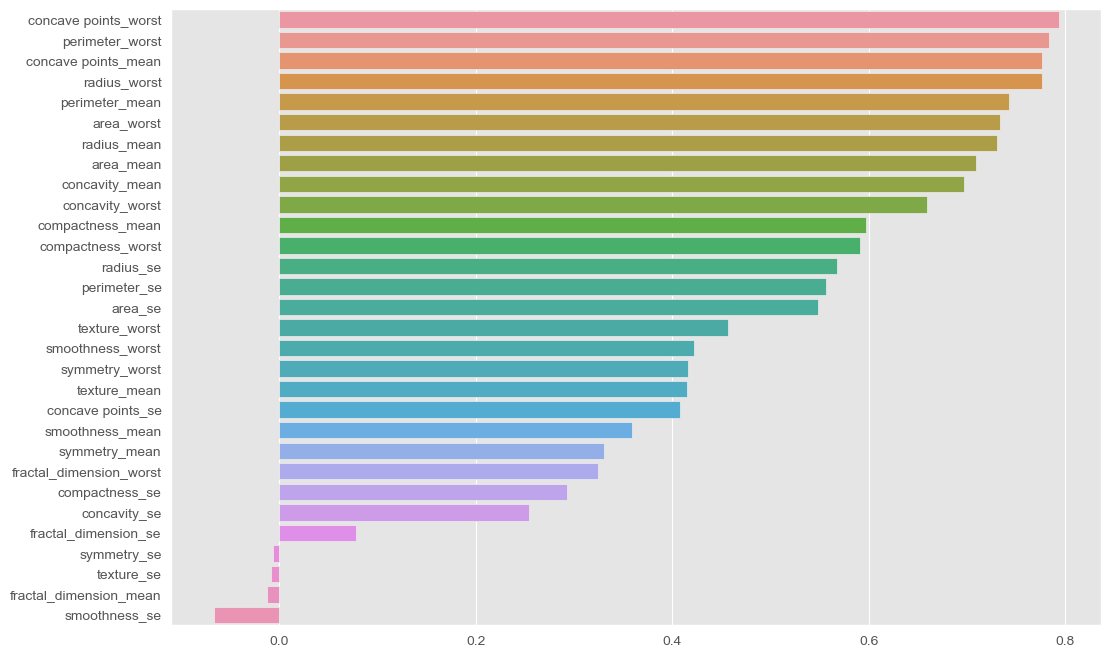

In [7]:
# Correlation between features of X and y, ascending order
corr = X.corrwith(y).sort_values(ascending=False)
sns.barplot(x=corr, y=corr.index)
plt.show()

### Skewness
Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

$$\tilde{\mu}_3 = \operatorname{E}\left[\left(\frac{X-\mu}{\sigma}\right)^3 \right]
             = \frac{\mu_3}{\sigma^3}
             = \frac{\operatorname{E}\left[(X-\mu)^3\right]}{( \operatorname{E}\left[ (X-\mu)^2 \right] )^{3/2}}
             = \frac{\kappa_3}{\kappa_2^{3/2}}
$$

where $μ$ is the mean, $σ$ is the standard deviation, $E$ is the expected value expectation operator

diagnosis is right skewed
radius_mean is right skewed
texture_mean is right skewed
perimeter_mean is right skewed
area_mean is right skewed
smoothness_mean is right skewed
compactness_mean is right skewed
concavity_mean is right skewed
concave points_mean is right skewed
symmetry_mean is right skewed
fractal_dimension_mean is right skewed
radius_se is right skewed
texture_se is right skewed
perimeter_se is right skewed
area_se is right skewed
smoothness_se is right skewed
compactness_se is right skewed
concavity_se is right skewed
concave points_se is right skewed
symmetry_se is right skewed
fractal_dimension_se is right skewed
radius_worst is right skewed
texture_worst is right skewed
perimeter_worst is right skewed
area_worst is right skewed
smoothness_worst is right skewed
compactness_worst is right skewed
concavity_worst is right skewed
concave points_worst is right skewed
symmetry_worst is right skewed
fractal_dimension_worst is right skewed


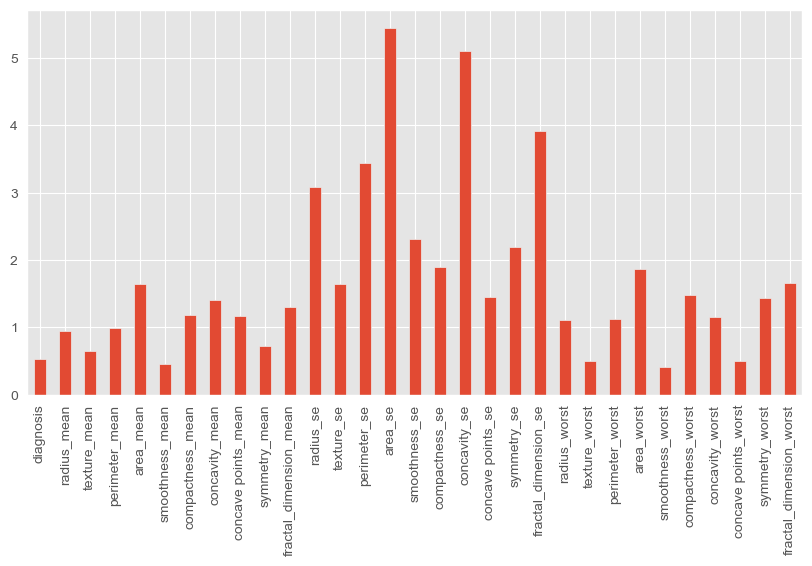

In [8]:
# Show if skewness is positive or negative or normal distribution
for i in data.columns:
    if data[i].skew() > 0:
        print(i, 'is right skewed')
    elif data[i].skew() < 0:
        print(i, 'is left skewed')
    else:
        print(i, 'is normally distributed')
# Skewness plot for dataframe
data.skew().plot(kind='bar', figsize=(10, 5))
plt.show()

### Shapiro

$$ W = {\left(\sum_{i=1}^n a_i x_{(i)}\right)^2 \over \sum_{i=1}^n (x_i-\overline{x})^2} $$

where:

* $x_{(i)}$ (with parentheses enclosing the subscript index ''i''
* $\overline{x} = \left( x_1 + \cdots + x_n \right) / n$

radius_mean Statistics=0.941, p=0.000
Probably not Gaussian
texture_mean Statistics=0.977, p=0.000
Probably not Gaussian
perimeter_mean Statistics=0.936, p=0.000
Probably not Gaussian
area_mean Statistics=0.858, p=0.000
Probably not Gaussian
smoothness_mean Statistics=0.987, p=0.000
Probably not Gaussian
compactness_mean Statistics=0.917, p=0.000
Probably not Gaussian
concavity_mean Statistics=0.867, p=0.000
Probably not Gaussian
concave points_mean Statistics=0.892, p=0.000
Probably not Gaussian
symmetry_mean Statistics=0.973, p=0.000
Probably not Gaussian
fractal_dimension_mean Statistics=0.923, p=0.000
Probably not Gaussian
radius_se Statistics=0.746, p=0.000
Probably not Gaussian
texture_se Statistics=0.896, p=0.000
Probably not Gaussian
perimeter_se Statistics=0.718, p=0.000
Probably not Gaussian
area_se Statistics=0.564, p=0.000
Probably not Gaussian
smoothness_se Statistics=0.838, p=0.000
Probably not Gaussian
compactness_se Statistics=0.837, p=0.000
Probably not Gaussian
concav

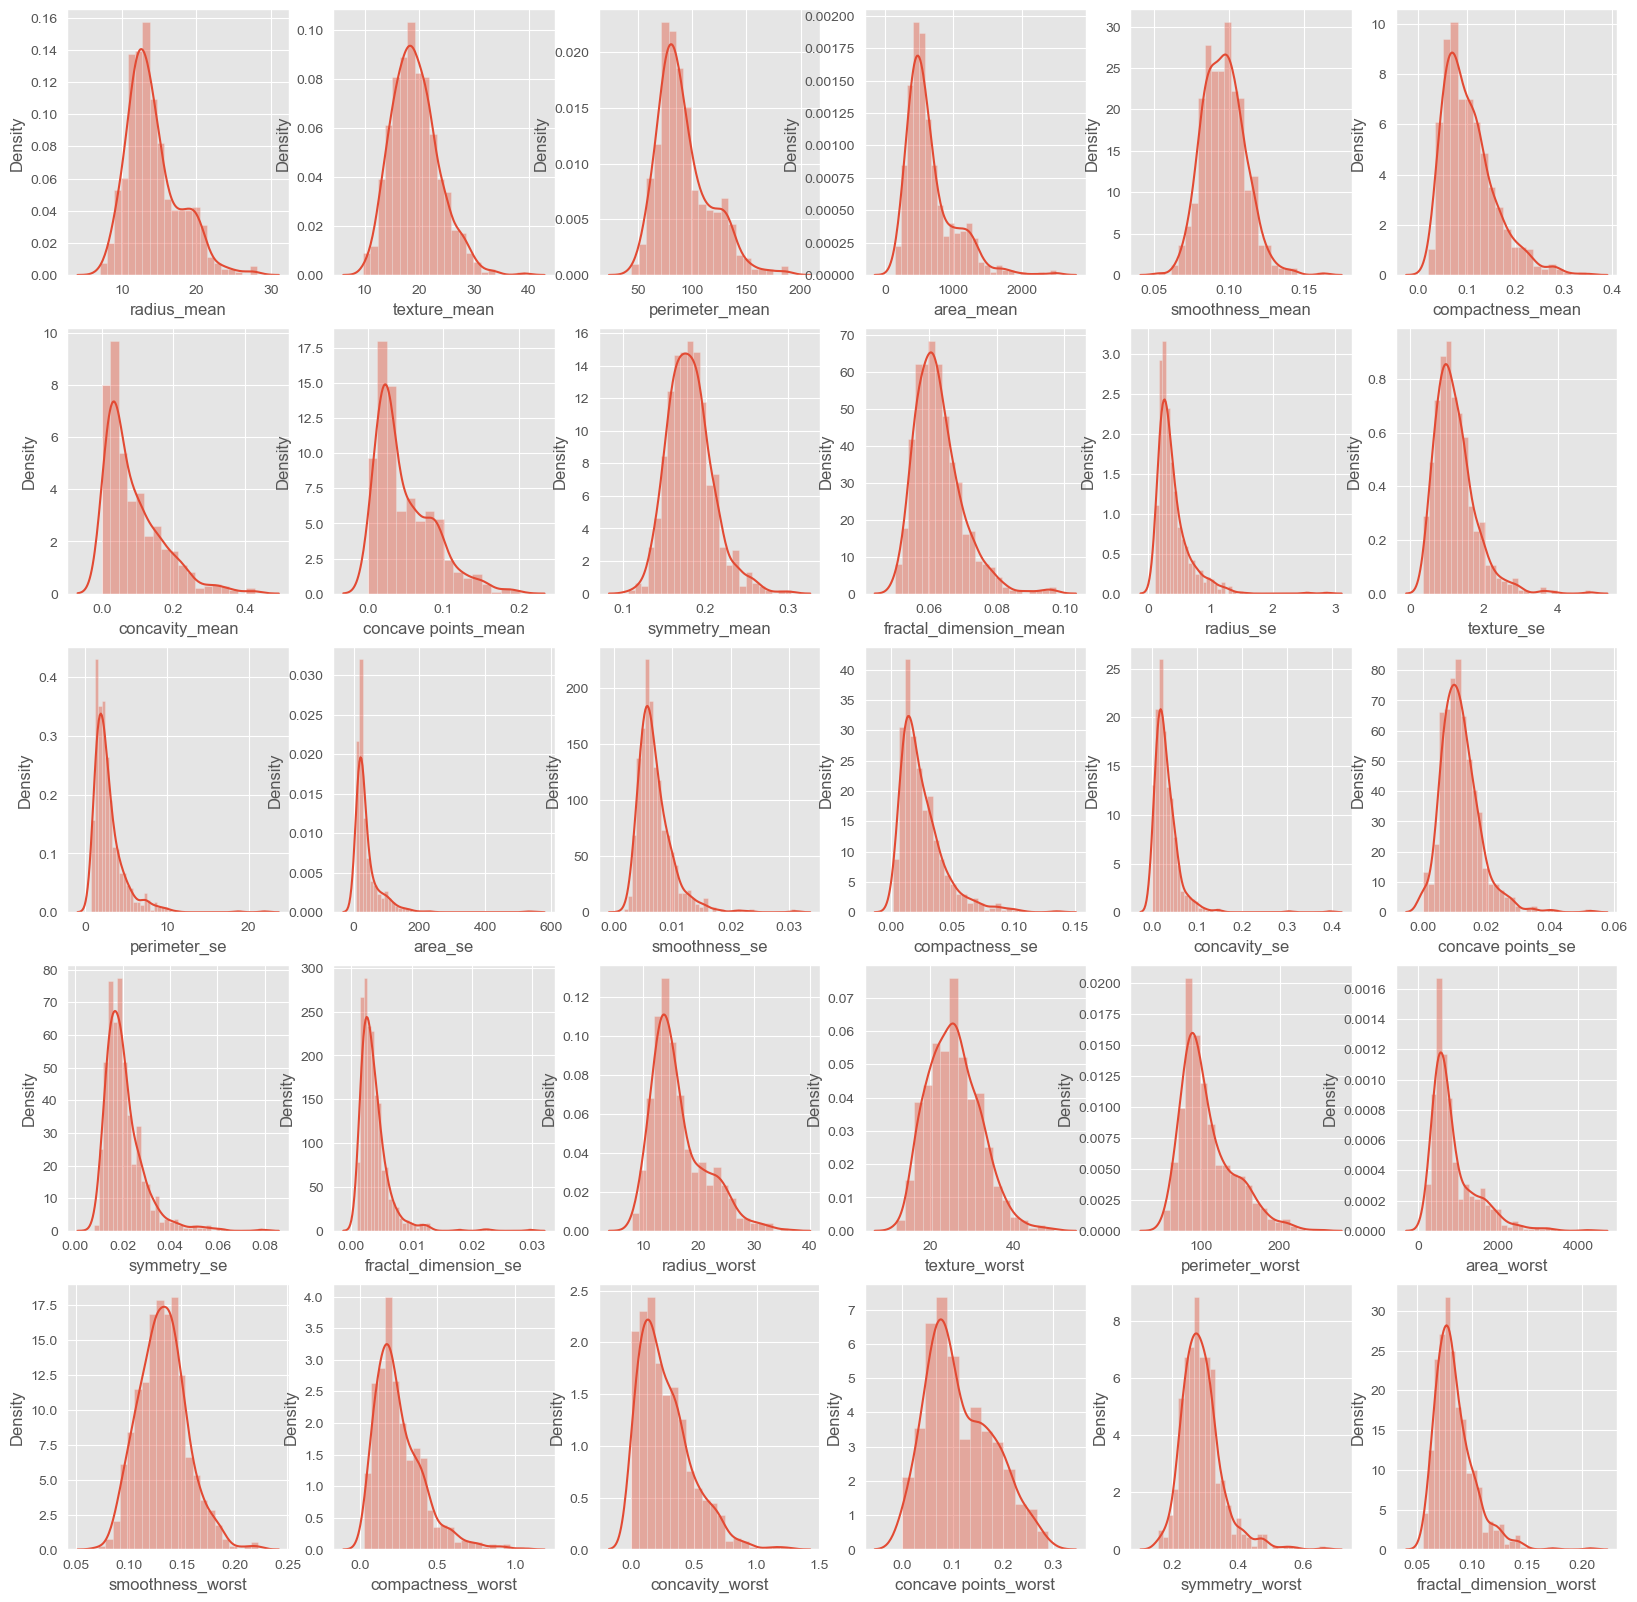

In [9]:
# Check normality of each feature, Gaussian distribution
from scipy.stats import shapiro

fig, ax = plt.subplots(5, 6, figsize=(20, 20))
for variable, subplot in zip(X.columns, ax.flatten()):
    sns.distplot(X[variable], ax=subplot)
    stat, p = shapiro(X[variable])
    print(variable, 'Statistics=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')
plt.show()

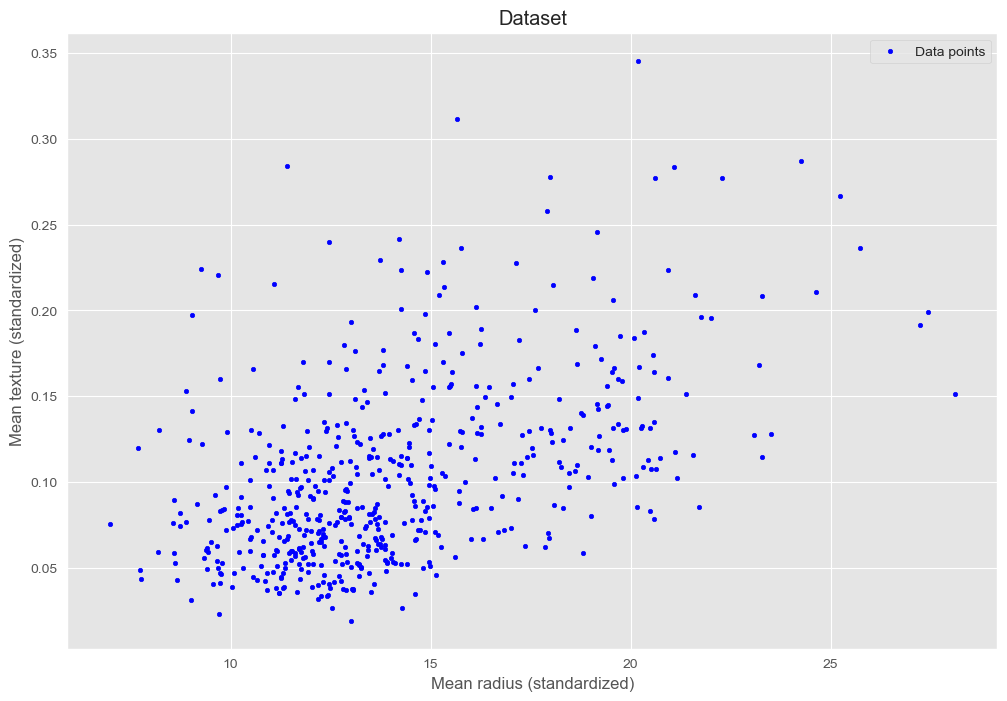

In [10]:
# Plot
plt.title('Dataset')
plt.scatter(X.iloc[:, 0], X.iloc[:, 5], color='blue', s=10., label='Data points')
plt.axis('tight')
plt.xlabel('Mean radius (standardized)')
plt.ylabel('Mean texture (standardized)')
plt.legend()
plt.show()

In [11]:
# Chevbyshev's inequality for each feature of X
# Chebyshev's inequality: P(|X - μ| ≥ kσ) ≤ 1/k^2 for k > 1
# P(|X - μ| ≥ kσ) is the probability that the random variable X is at least k standard deviations away from the mean μ
# k is a constant greater than 1
for i in X.columns:
    print(i, 'mean:', X[i].mean(), 'std:', X[i].std())
    print('Chebyshev\'s inequality:', X[i].mean() - 2 * X[i].std(), '<=', i, '<=', X[i].mean() + 2 * X[i].std())

radius_mean mean: 14.127291739894563 std: 3.524048826212078
Chebyshev's inequality: 7.079194087470407 <= radius_mean <= 21.17538939231872
texture_mean mean: 19.28964850615117 std: 4.301035768166949
Chebyshev's inequality: 10.687576969817272 <= texture_mean <= 27.89172004248507
perimeter_mean mean: 91.96903339191566 std: 24.2989810387549
Chebyshev's inequality: 43.37107131440586 <= perimeter_mean <= 140.56699546942545
area_mean mean: 654.8891036906857 std: 351.9141291816527
Chebyshev's inequality: -48.93915467261968 <= area_mean <= 1358.717362053991
smoothness_mean mean: 0.096360281195079 std: 0.014064128137673616
Chebyshev's inequality: 0.06823202491973177 <= smoothness_mean <= 0.12448853747042624
compactness_mean mean: 0.10434098418277686 std: 0.0528127579325122
Chebyshev's inequality: -0.0012845316822475417 <= compactness_mean <= 0.20996650004780126
concavity_mean mean: 0.08879931581722322 std: 0.0797198087078935
Chebyshev's inequality: -0.07064030159856377 <= concavity_mean <= 0.248

In [12]:
# Estimate interval confidence for each feature of X
# Interval confidence: μ ± zα/2σ/sqrt(n)
# μ is the mean of the population
# σ is the standard deviation of the population
# n is the number of observations
# zα/2 is the z-score for the desired confidence level
# α is the desired confidence level

def interval_confidence(data, alpha):
    z = stats.norm.ppf(1 - alpha / 2)
    mean = data.mean()
    std = data.std()
    n = len(data)
    return mean - z * std / np.sqrt(n), mean + z * std / np.sqrt(n)

# Estimate interval confidence for each feature of X with alpha = 0.05
for i in X.columns:
    print(i, 'mean:', X[i].mean(), 'std:', X[i].std())
    print('Interval confidence:', interval_confidence(X[i], 0.05))
    print()

radius_mean mean: 14.127291739894563 std: 3.524048826212078
Interval confidence: (13.837734868964597, 14.416848610824529)

texture_mean mean: 19.28964850615117 std: 4.301035768166949
Interval confidence: (18.936249753692078, 19.643047258610263)

perimeter_mean mean: 91.96903339191566 std: 24.2989810387549
Interval confidence: (89.97248417726382, 93.9655826065675)

area_mean mean: 654.8891036906857 std: 351.9141291816527
Interval confidence: (625.9737398274068, 683.8044675539646)

smoothness_mean mean: 0.096360281195079 std: 0.014064128137673616
Interval confidence: (0.09520468854108047, 0.09751587384907753)

compactness_mean mean: 0.10434098418277686 std: 0.0528127579325122
Interval confidence: (0.10000157298666205, 0.10868039537889167)

concavity_mean mean: 0.08879931581722322 std: 0.0797198087078935
Interval confidence: (0.08224906084093082, 0.09534957079351562)

concave points_mean mean: 0.048919145869947236 std: 0.03880284485915359
Interval confidence: (0.04573087269477834, 0.05210

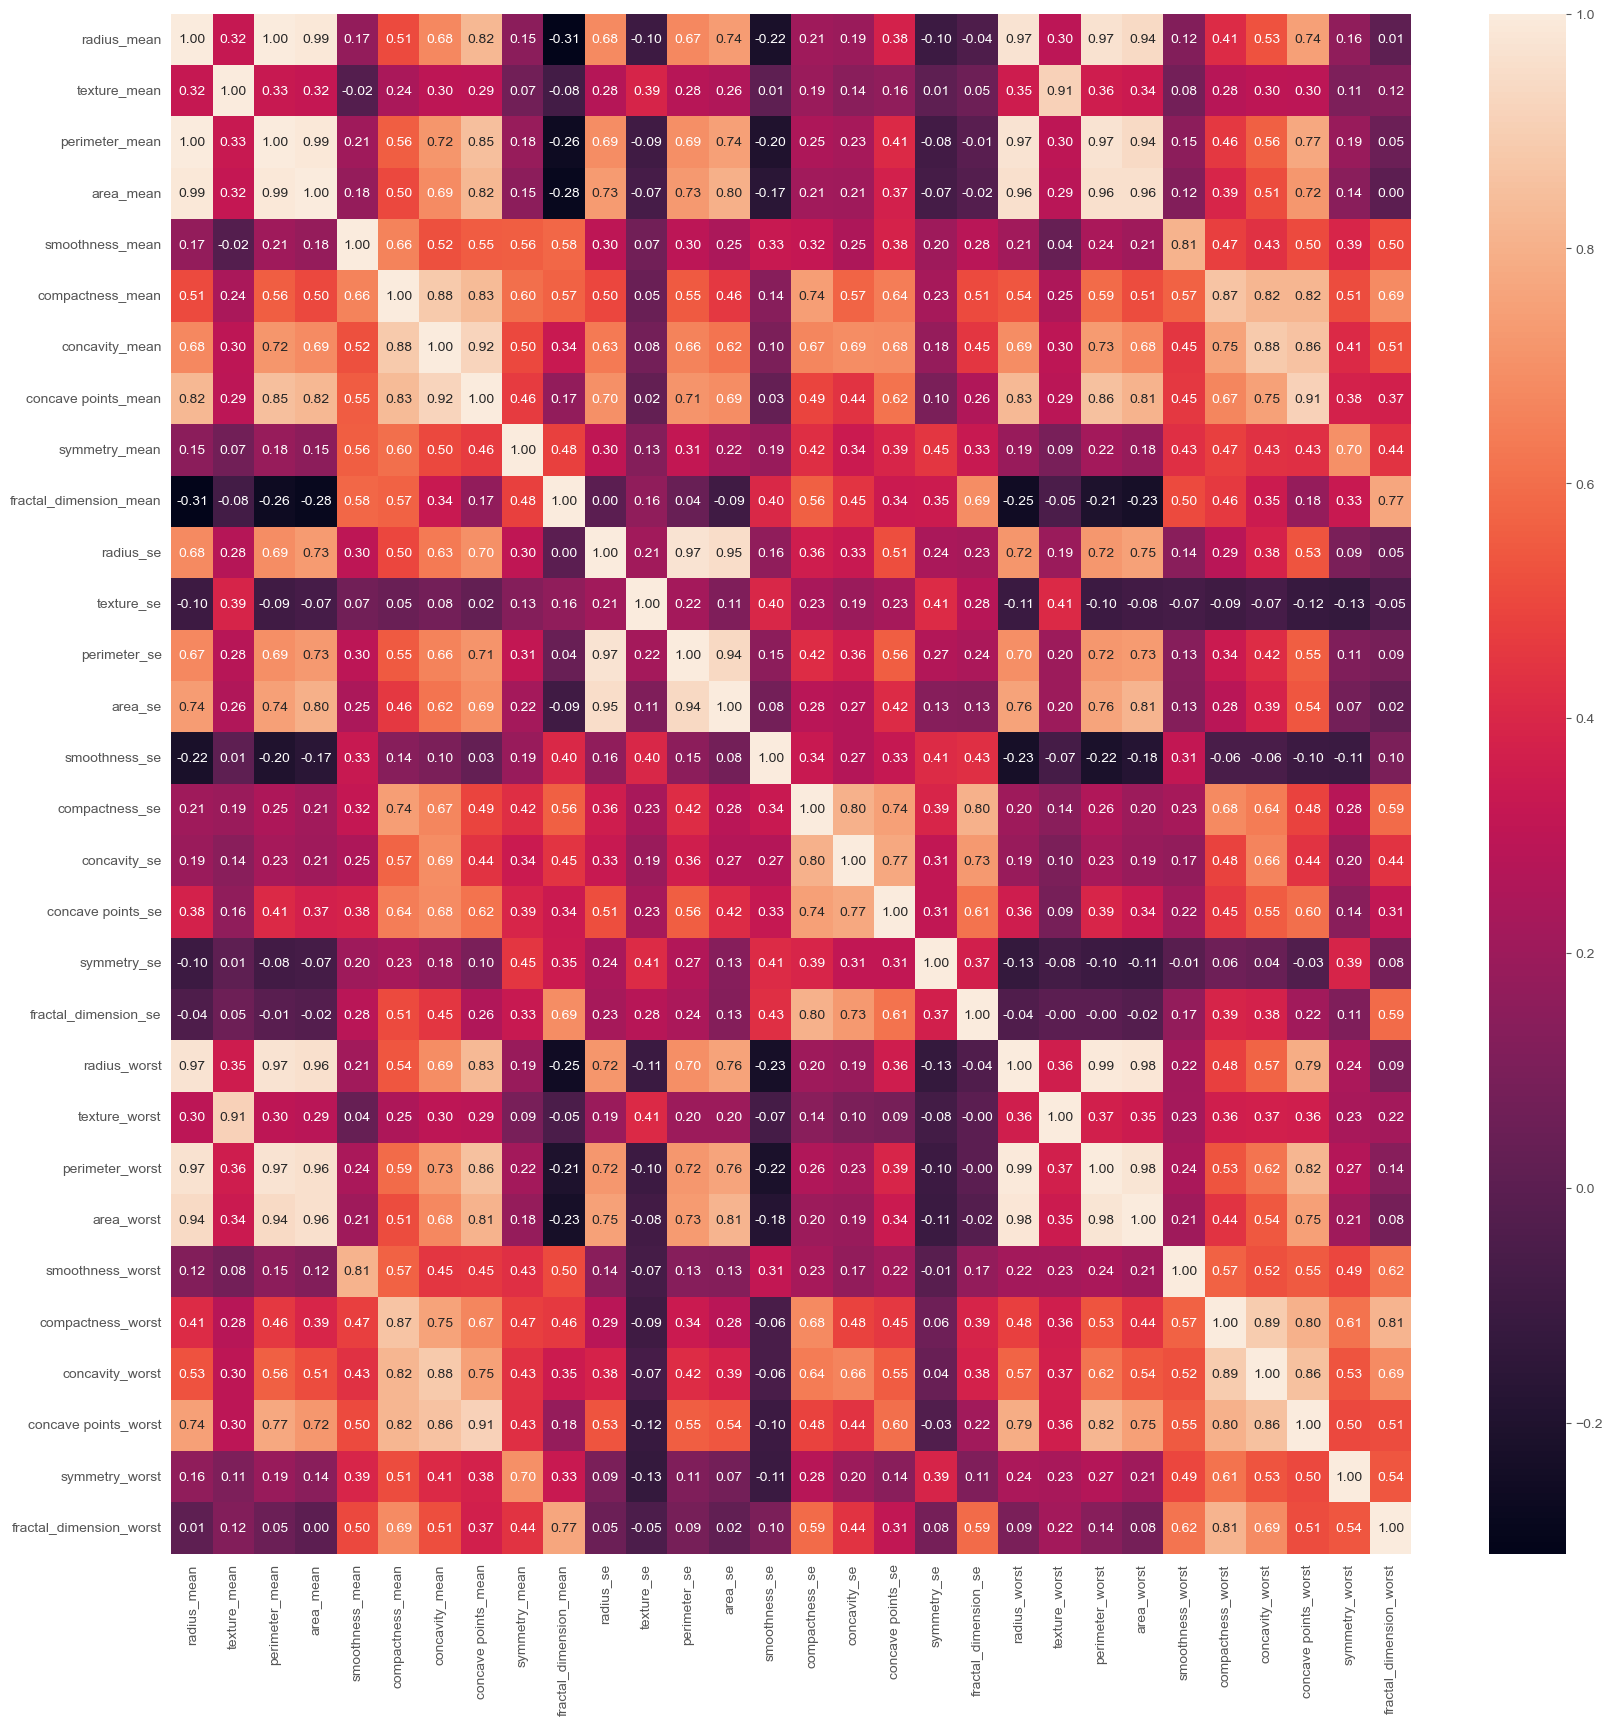

In [13]:
# Correlation matrix of X
corr = X.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [14]:
# Create 3 groups of features, mean, se and worst
mean_features = [col for col in X.columns if 'mean' in col]
se_features = [col for col in X.columns if 'se' in col]
worst_features = [col for col in X.columns if 'worst' in col]

In [ ]:
sns.pairplot(data, vars=mean_features, hue='diagnosis', diag_kind='kde')
plt.show()

In [ ]:
sns.pairplot(data, vars=se_features, hue='diagnosis', diag_kind='kde')
plt.show()

In [ ]:
sns.pairplot(data, vars=worst_features, hue='diagnosis', diag_kind='kde')
plt.show()

In [ ]:
sns.clustermap(data[mean_features].corr(), annot=True, fmt='.2f')
sns.clustermap(data[se_features].corr(), annot=True, fmt='.2f')
sns.clustermap(data[worst_features].corr(), annot=True, fmt='.2f')
plt.show()

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, feature in enumerate(mean_features):
    sns.violinplot(x='diagnosis', y=feature, data=data, ax=axes[i // 3, i % 3])
plt.show()

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, feature in enumerate(se_features):
    sns.violinplot(x='diagnosis', y=feature, data=data, ax=axes[i // 3, i % 3])
plt.show()

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, feature in enumerate(worst_features):
    sns.violinplot(x='diagnosis', y=feature, data=data, ax=axes[i // 3, i % 3])
plt.show()